In [115]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display
!pip install gym
!pip install pyglet
import numpy as np
import gym

You are using pip version 10.0.1, however version 20.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 10.0.1, however version 20.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [116]:
env = gym.make('MountainCar-v0')
state = env.reset()
print(state)

[-0.56205711  0.        ]


In [117]:
print('State space: ', env.observation_space)
print('Action space: ', env.action_space)

State space:  Box(2,)
Action space:  Discrete(3)


In [118]:
print('State space Low: ', env.observation_space.low)
print('State space High: ', env.observation_space.high)

State space Low:  [-1.2  -0.07]
State space High:  [0.6  0.07]


In [119]:
num_states = (env.observation_space.high - env.observation_space.low)*np.array([10, 100])
num_states = np.round(num_states, 0).astype(int) + 1
print(num_states)

[19 15]


In [120]:
# Discretize state
def discretize_state(state, env_low):
    state_adj = (state - env_low)*np.array([10, 100])
    state_adj = np.round(state_adj, 0).astype(int)
    return state_adj

In [121]:
env.reset()

def show_state(env,step=0, info=""):
    plt.figure(1)
    plt.clf()
    env.render(mode='rgb_array')
    plt.title("Step: %d %s" % (step, info))
    plt.axis('off')
    display.clear_output(wait=True)
    display.display(plt.gcf())

In [122]:
env.reset()
done = False
step_index = 0
while done != True:
    action = env.action_space.sample() # get a random action from the set of actions
    state, reward, done, info = env.step(action) # perform the action and receive new state and
    d_state = discretize_state(state, env.observation_space.low)
    show_state(env, step=step_index, info='State ({},{}) Reward: {}'.format(d_state[0], d_state[1], reward))
    step_index = step_index + 1
env.close()

ImportError: 
    Error occurred while running `from pyglet.gl import *`
    HINT: make sure you have OpenGL install. On Ubuntu, you can run 'apt-get install python-opengl'.
    If you're running on a server, you may need a virtual frame buffer; something like this should work:
    'xvfb-run -s "-screen 0 1400x900x24" python <your_script.py>'
    

<Figure size 432x288 with 0 Axes>

In [123]:
import matplotlib.pyplot as plt
import gym
from IPython import display
%matplotlib inline

env = gym.make('CartPole-v0')
env.reset()

for i in range(25):
   plt.imshow(env.render(mode='rgb_array'))
   display.display(plt.gcf())    
   display.clear_output(wait=True)
   env.step(env.action_space.sample()) # take a random action

env.close()

ImportError: 
    Error occurred while running `from pyglet.gl import *`
    HINT: make sure you have OpenGL install. On Ubuntu, you can run 'apt-get install python-opengl'.
    If you're running on a server, you may need a virtual frame buffer; something like this should work:
    'xvfb-run -s "-screen 0 1400x900x24" python <your_script.py>'
    

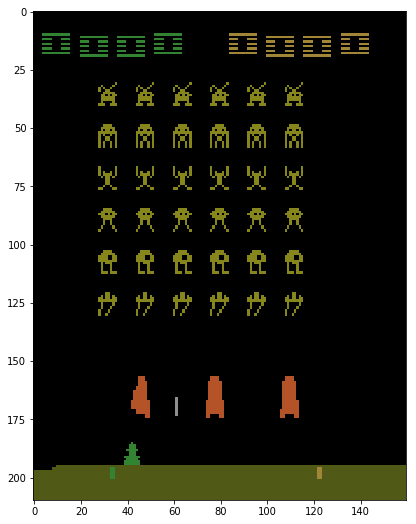

In [124]:
import gym
from IPython import display
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

env = gym.make('SpaceInvaders-v0')
env.reset()
plt.figure(figsize=(9,9))
img = plt.imshow(env.render(mode='rgb_array')) # only call this once
for _ in range(100):
    img.set_data(env.render(mode='rgb_array')) # just update the data
    display.display(plt.gcf())
    display.clear_output(wait=True)
    action = env.action_space.sample()
    env.step(action)
env.close()